In [1]:
import numpy as np
import pandas as pd

## Part A: Data Preprocessing and Exploratory Analysis

In [2]:
df = pd.read_csv('train.csv')

In [3]:
rows, cols = df.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {cols}")


Number of rows: 41348
Number of columns: 7


In [4]:
print("Dataset information and types:")
df.info()

Dataset information and types:
<class 'pandas.DataFrame'>
RangeIndex: 41348 entries, 0 to 41347
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   neighbourhood_group  40509 non-null  str    
 1   room_type            40737 non-null  str    
 2   minimum_nights       40026 non-null  float64
 3   amenity_score        40432 non-null  float64
 4   number_of_reviews    40225 non-null  float64
 5   availability_365     40753 non-null  float64
 6   price_class          41348 non-null  int64  
dtypes: float64(4), int64(1), str(2)
memory usage: 2.2 MB


In [5]:
df.describe()

,minimum_nights,amenity_score,number_of_reviews,availability_365,price_class
count,40026.000000,40432.000000,40225.000000,40753.000000,41348.000000
mean,7.002873,51.987233,23.648154,111.912178,1.231619
std,19.725353,19.459480,44.518303,131.273916,0.758579
min,1.000000,10.000000,0.000000,0.000000,0.000000
25%,1.000000,36.800000,1.000000,0.000000,1.000000
50%,3.000000,51.400000,5.000000,44.000000,1.000000
75%,5.000000,66.100000,24.000000,224.000000,2.000000
max,1000.000000,99.000000,607.000000,365.000000,3.000000


In [6]:
# Check for missing values per column
missing_counts = df.isnull().sum()
print(missing_counts)

neighbourhood_group     839
room_type               611
minimum_nights         1322
amenity_score           916
number_of_reviews      1123
availability_365        595
price_class               0
dtype: int64


In [7]:
# Calculate the percentage of missing values
missing_percentage = (missing_counts / len(df)) * 100
print(missing_percentage)

neighbourhood_group    2.029119
room_type              1.477701
minimum_nights         3.197253
amenity_score          2.215343
number_of_reviews      2.715972
availability_365       1.439006
price_class            0.000000
dtype: float64


In [8]:
cols_to_fix_median = ['minimum_nights', 'number_of_reviews', 'availability_365', 'amenity_score']
for col in cols_to_fix_median:
    df[col] = df[col].fillna(df[col].median())

In [9]:
cols_to_fix_mode = ['neighbourhood_group', 'room_type', 'price_class']
for col in cols_to_fix_mode:
    df[col] = df[col].fillna(df[col].mode()[0])

In [10]:
df.isnull().sum()

neighbourhood_group    0
room_type              0
minimum_nights         0
amenity_score          0
number_of_reviews      0
availability_365       0
price_class            0
dtype: int64

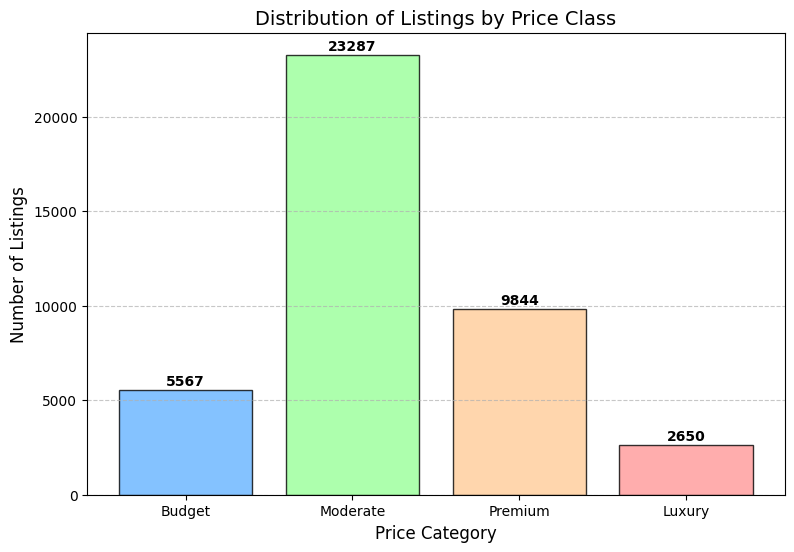

In [11]:
import matplotlib.pyplot as plt

class_counts = df['price_class'].value_counts().sort_index()

class_labels = {0: 'Budget', 1: 'Moderate', 2: 'Premium', 3: 'Luxury'}
names = [class_labels[i] for i in class_counts.index]

plt.figure(figsize=(9, 6))
colors = ['#66b3ff', '#99ff99', '#ffcc99', '#ff9999']
bars = plt.bar(names, class_counts.values, color=colors, edgecolor='black', alpha=0.8)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 50, int(yval), 
             ha='center', va='bottom', fontweight='bold')

plt.title('Distribution of Listings by Price Class', fontsize=14)
plt.xlabel('Price Category', fontsize=12)
plt.ylabel('Number of Listings', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

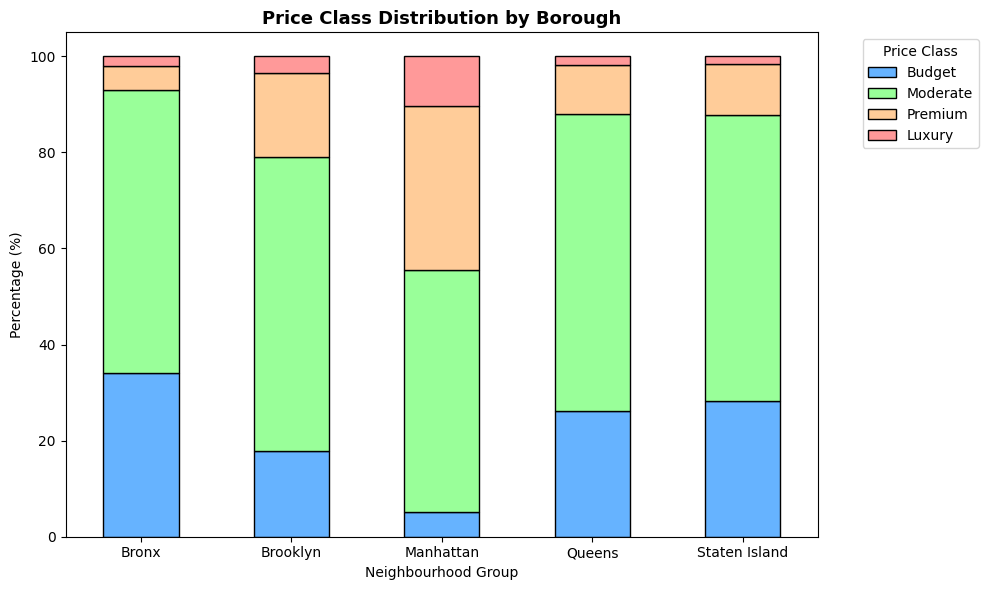

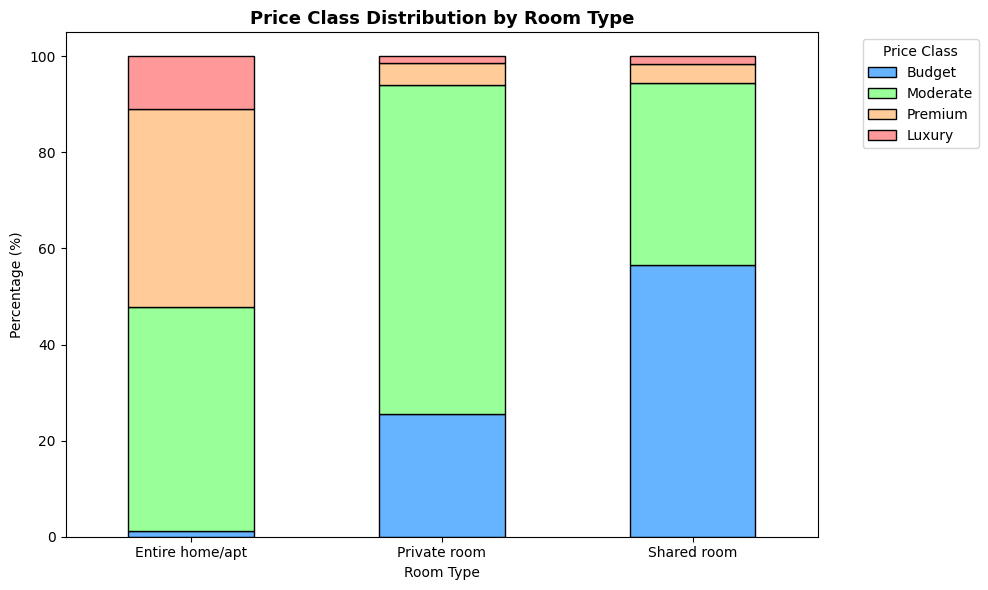

In [12]:
price_labels = ['Budget', 'Moderate', 'Premium', 'Luxury']
num_features = ['amenity_score', 'minimum_nights', 'number_of_reviews', 'availability_365']

def plot_stacked_bar(feature_name, title):
    # Create a frequency table (normalized to 100% per category)
    ct = pd.crosstab(df[feature_name], df['price_class'], normalize='index') * 100
    
    # Plotting using Matplotlib's built-in pandas wrapper (which uses matplotlib only)
    ax = ct.plot(kind='bar', stacked=True, figsize=(10, 6), 
                 color=colors, edgecolor='black')
    
    plt.title(title, fontsize=13, fontweight='bold')
    plt.xlabel(feature_name.replace("_", " ").title())
    plt.ylabel('Percentage (%)')
    plt.legend(price_labels, title='Price Class', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45 if feature_name == 'neighbourhood group' else 0)
    plt.tight_layout()

# Plot both categorical features
plot_stacked_bar('neighbourhood_group', 'Price Class Distribution by Borough')
plot_stacked_bar('room_type', 'Price Class Distribution by Room Type')

### Which features you expect to be most influential for prediction

amenity_score is clearly the winner. It has a correlation of 0.86 with price_class, which is quite high. This shows clearly, that if we even change this a bit it'll impact the model's output.

### Whether any feature appears unusually predictive or suspiciously dominant.

The correlation of amenity_score is so high, that it is concerning. It is suspiciously dominant feature, due to which the whole model's output is dependent on this one feature.

In [13]:
# Using one-hot encoding for neighbourhood_group and room_type
df = pd.get_dummies(df, columns=['neighbourhood_group', 'room_type'], prefix=['n_group', 'r_type'], dtype=int)

In [14]:
df.head()

,minimum_nights,amenity_score,number_of_reviews,availability_365,price_class,n_group_Bronx,n_group_Brooklyn,n_group_Manhattan,n_group_Queens,n_group_Staten Island,r_type_Entire home/apt,r_type_Private room,r_type_Shared room
0,2.0,82.5,15.0,254.0,3,0,0,1,0,0,1,0,0
1,2.0,53.7,1.0,0.0,1,0,0,1,0,0,0,1,0
2,2.0,47.8,70.0,90.0,1,0,1,0,0,0,0,1,0
3,2.0,58.8,1.0,44.0,1,0,0,1,0,0,1,0,0
4,2.0,32.2,0.0,89.0,1,1,0,0,0,0,0,1,0


In [15]:
# Normalizing the data
from sklearn.preprocessing import StandardScaler

cols = ['minimum_nights', 'amenity_score', 'number_of_reviews', 'availability_365']

scaler = StandardScaler()
df[cols] = scaler.fit_transform(df[cols])

# Preview the results
print(df[cols].describe())

       minimum_nights  amenity_score  number_of_reviews  availability_365
count    4.134800e+04   4.134800e+04       4.134800e+04      4.134800e+04
mean    -2.861211e-17  -9.279604e-17      -3.436890e-17     -5.636500e-17
std      1.000012e+00   1.000012e+00       1.000012e+00      1.000012e+00
min     -3.025178e-01  -2.181308e+00      -5.257853e-01     -8.495871e-01
25%     -3.025178e-01  -7.729808e-01      -5.030650e-01     -8.495871e-01
50%     -1.995311e-01  -2.984115e-02      -4.121839e-01     -5.126163e-01
75%     -9.654441e-02   7.184953e-01      -3.218907e-03      8.352671e-01
max      5.113933e+01   2.443827e+00       1.326542e+01      1.945739e+00


Correlation Table:
                   minimum_nights  number_of_reviews  availability_365  \
minimum_nights           1.000000          -0.081572          0.134664   
number_of_reviews       -0.081572           1.000000          0.170843   
availability_365         0.134664           0.170843          1.000000   
amenity_score            0.023137          -0.030034          0.079270   
price_class              0.016005          -0.034259          0.094887   

                   amenity_score  price_class  
minimum_nights          0.023137     0.016005  
number_of_reviews      -0.030034    -0.034259  
availability_365        0.079270     0.094887  
amenity_score           1.000000     0.865352  
price_class             0.865352     1.000000  


<Axes: >

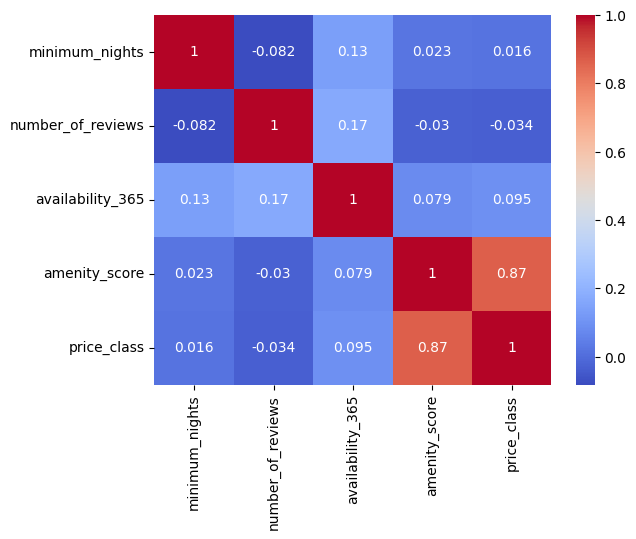

In [16]:
import seaborn as sns

columns_to_check = ['minimum_nights', 'number_of_reviews', 'availability_365', 'amenity_score', 'price_class']
correlations = df[columns_to_check].corr()

print("Correlation Table:")
print(correlations)

sns.heatmap(correlations, cmap='coolwarm', annot=True)

## Part B Two-Layer Perceptron Implemented from Scratch

In [17]:
def relu(z):
    return np.maximum(0, z)

In [18]:
def sigmoid(Z):
    return 1/(1+np.exp(-Z))

In [19]:
def sigmoid_derivative(Z):
    s = sigmoid(Z)
    return s * (1 - s)

In [20]:
def relu_derivative(Z):
    return Z > 0

In [21]:
def softmax(Z):
  z_exp = np.exp(Z - np.max(Z, axis = 0, keepdims = True))
  softmax = z_exp / np.sum(z_exp, axis = 0, keepdims = True)
  return softmax

In [22]:
def cross_entropy_loss(Y_pred, Y_true):
    m = Y_true.shape[1]
    # Add small epsilon to avoid log(0)
    epsilon = 1e-15
    Y_pred = np.clip(Y_pred, epsilon, 1 - epsilon)
    loss = -np.sum(Y_true * np.log(Y_pred)) / m
    return loss

In [23]:
def accuracy(Y_pred, Y_true):
    Y_pred = np.argmax(Y_pred, axis=0)
    Y_true = np.argmax(Y_true, axis=0)
    return np.mean(Y_pred == Y_true)


In [24]:
def one_hot_encode(Y, num_classes):
    m = Y.shape[0]
    Y_one_hot = np.zeros((num_classes, m))
    for i in range(m):
        Y_one_hot[int(Y[i]) - 1, i] = 1  # Assuming classes are 1-indexed
    return Y_one_hot

In [25]:
def init_parameters(input_size):
    np.random.seed(1)
    # Layer - 1
    W1 = np.random.randn(10, input_size) * 0.01
    b1 = np.random.randn(10, 1) * 0.01

    # Layer - 2
    W2 = np.random.randn(10, 10) * 0.01
    b2 = np.random.randn(10, 1) * 0.01

    # Layer - 3 (output layer)
    W3 = np.random.randn(4, 10) * 0.01
    b3 = np.random.randn(4, 1) * 0.01

    parameters = (W1, b1, W2, b2, W3, b3)
    return parameters

In [26]:
def update_parameters(parameters, pass_gradients, learning_rate):
    W1, b1, W2, b2, W3, b3 = parameters
    dL_dW1, dL_db1, dL_dW2, dL_db2, dL_dW3, dL_db3 = pass_gradients

    W1 = W1 - learning_rate * dL_dW1
    b1 = b1 - learning_rate * dL_db1

    W2 = W2 - learning_rate * dL_dW2
    b2 = b2 - learning_rate * dL_db2

    W3 = W3 - learning_rate * dL_dW3
    b3 = b3 - learning_rate * dL_db3

    updated_params = (W1, b1, W2, b2, W3, b3)
    return updated_params

In [27]:
def forward_prop(X, parameters, activation='relu'):
    W1, b1, W2, b2, W3, b3 = parameters

    if activation == 'sigmoid':
        activation_fn = sigmoid
    else:  # default to relu
        activation_fn = relu

    Z1 = W1 @ X.T + b1
    A1 = activation_fn(Z1)

    Z2 = W2 @ A1 + b2
    A2 = activation_fn(Z2)

    Z3 = W3 @ A2 + b3
    A3 = softmax(Z3)

    pass_activations = (Z1, A1, Z2, A2, Z3, A3)
    return A3, pass_activations

In [28]:
def backward_prop(X, Y, parameters, forwardpass_activations, activation='relu'):
    X = np.asarray(X)
    Y = np.asarray(Y)

    m = X.T.shape[1]

    W1, b1, W2, b2, W3, b3 = [np.asarray(p) for p in parameters]
    Z1, A1, Z2, A2, Z3, A3 = [np.asarray(a) for a in forwardpass_activations]

    if activation == 'sigmoid':
        activation_derivative = sigmoid_derivative
    else:  # default to relu
        activation_derivative = relu_derivative

    # layer - 3 (output layer with softmax)
    dL_dZ3 = A3 - Y

    dZ3_dW3 = A2.T
    dL_dW3 = (1/m) * np.dot(dL_dZ3, dZ3_dW3)

    dZ3_db3 = 1
    dL_db3 = (1/m) * np.sum(dL_dZ3, axis=1, keepdims=True)


    # LAYER - 2
    dZ3_dA2 = W3.T
    dL_dA2 = np.dot(dZ3_dA2, dL_dZ3)  # Switched positions

    dA2_dZ2 = activation_derivative(Z2)  # Here A2 is f(Z2)
    dL_dZ2 = dL_dA2 * dA2_dZ2

    dZ2_dW2 = A1.T
    dL_dW2 = (1/m) * np.dot(dL_dZ2, dZ2_dW2)

    dZ2_db2 = 1
    dL_db2 = (1/m) * np.sum(dL_dZ2, axis=1, keepdims=True)


    # LAYER - 1
    dZ2_dA1 = W2.T
    dL_dA1 = np.dot(dZ2_dA1, dL_dZ2)  # SWITCHED POSITIONS

    dA1_dZ1 = activation_derivative(Z1)  # Here A1 is f(Z1)
    dL_dZ1 = dL_dA1 * dA1_dZ1

    dZ1_dW1 = X
    dL_dW1 = (1/m) * np.dot(dL_dZ1, dZ1_dW1)

    dZ1_db1 = 1
    dL_db1 = (1/m) * np.sum(dL_dZ1, axis=1, keepdims=True)


    pass_gradients = (dL_dW1, dL_db1, dL_dW2, dL_db2, dL_dW3, dL_db3)
    return pass_gradients


In [29]:
def train(X, Y, learning_rate, num_iterations, activation='relu'):
    input_size = X.shape[1]
    parameters = init_parameters(input_size)
    loss_history = []
    acc_history = []
    
    for i in range(num_iterations):
        # Forward propagation
        A3, forwardpass_activations = forward_prop(X, parameters, activation)
        
        # Compute loss
        loss = cross_entropy_loss(A3, Y)
        acc = accuracy(A3, Y)
        loss_history.append(loss)
        acc_history.append(acc)
        
        # Backward propagation
        gradients = backward_prop(X, Y, parameters, forwardpass_activations, activation)
        
        # Update parameters
        parameters = update_parameters(parameters, gradients, learning_rate)
        
        # Print loss every 20 iterations
        if (i + 1) % 20 == 0:
            print(f"Iteration {i + 1}/{num_iterations}, Loss: {loss:.6f}")
    
    return parameters, loss_history, acc_history

In [30]:
# Data Preparation
np.random.seed(1)

X = df.drop('price_class', axis=1).values
Y = df['price_class'].values

# One-hot encode the labels (4 classes: 1, 2, 3, 4)
num_classes = 4
Y_one_hot = one_hot_encode(Y, num_classes)

print(f"X shape: {X.shape}")
print(f"Y shape: {Y.shape}")
print(f"Y_one_hot shape: {Y_one_hot.shape}")


X shape: (41348, 12)
Y shape: (41348,)
Y_one_hot shape: (4, 41348)


In [31]:

## (a) Training with Sigmoid Activation Function for Hidden Layers

learning_rate = 0.01
num_iterations = 200

parameters_sigmoid, loss_history_sigmoid, acc_history_sigmoid = train(
    X, Y_one_hot, 
    learning_rate=learning_rate, 
    num_iterations=num_iterations, 
    activation='sigmoid'
)

print(f"\nFinal Loss (Sigmoid): {loss_history_sigmoid[-1]:.6f}")
print(f"Final Accuracy (Sigmoid): {acc_history_sigmoid[-1]:.6f}")

Iteration 20/200, Loss: 1.309551
Iteration 40/200, Loss: 1.247247
Iteration 60/200, Loss: 1.205371
Iteration 80/200, Loss: 1.177454
Iteration 100/200, Loss: 1.158802
Iteration 120/200, Loss: 1.146208
Iteration 140/200, Loss: 1.137561
Iteration 160/200, Loss: 1.131497
Iteration 180/200, Loss: 1.127146
Iteration 200/200, Loss: 1.123946

Final Loss (Sigmoid): 1.123946
Final Accuracy (Sigmoid): 0.563195


In [32]:
## (b) Training with ReLU Activation Function for Hidden Layers

learning_rate = 0.01
num_iterations = 200

parameters_relu, loss_history_relu, acc_history_relu = train(
    X, Y_one_hot, 
    learning_rate=learning_rate, 
    num_iterations=num_iterations, 
    activation='relu'
)

print(f"\nFinal Loss (ReLU): {loss_history_relu[-1]:.6f}")
print(f"Final Accuracy (ReLU): {acc_history_relu[-1]:.6f}")

Iteration 20/200, Loss: 1.363226
Iteration 40/200, Loss: 1.337635
Iteration 60/200, Loss: 1.314605
Iteration 80/200, Loss: 1.293927
Iteration 100/200, Loss: 1.275399
Iteration 120/200, Loss: 1.258827
Iteration 140/200, Loss: 1.244025
Iteration 160/200, Loss: 1.230817
Iteration 180/200, Loss: 1.219041
Iteration 200/200, Loss: 1.208547

Final Loss (ReLU): 1.208547
Final Accuracy (ReLU): 0.563195


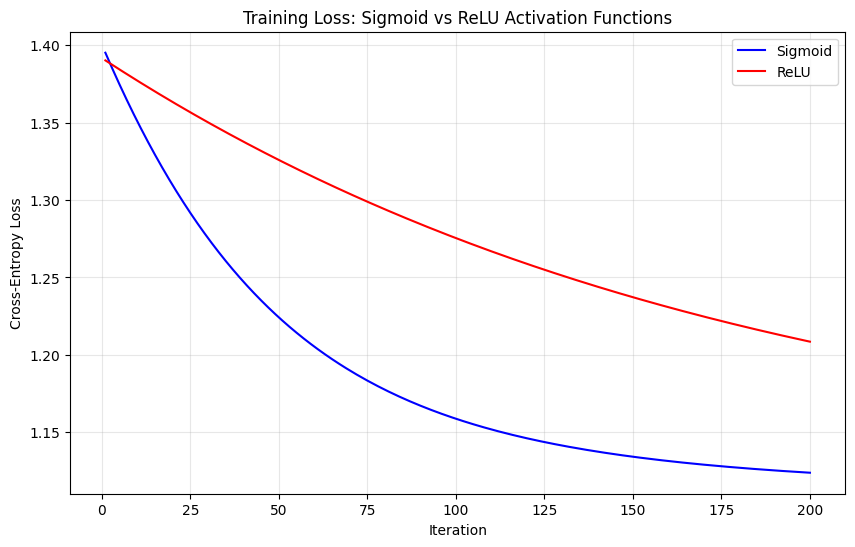

Summary
Final Loss (Sigmoid): 1.123946
Final Loss (ReLU):    1.208547


In [33]:
import matplotlib.pyplot as plt

# Plot training curves for both activation functions
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(loss_history_sigmoid) + 1), loss_history_sigmoid, label='Sigmoid', color='blue')
plt.plot(range(1, len(loss_history_relu) + 1), loss_history_relu, label='ReLU', color='red')
plt.xlabel('Iteration')
plt.ylabel('Cross-Entropy Loss')
plt.title('Training Loss: Sigmoid vs ReLU Activation Functions')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Print final comparison
print("Summary")
print(f"Final Loss (Sigmoid): {loss_history_sigmoid[-1]:.6f}")
print(f"Final Loss (ReLU):    {loss_history_relu[-1]:.6f}")

In [34]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [35]:
X_tensor = torch.tensor(X, dtype=torch.float32)
Y_tensor = torch.tensor(Y, dtype=torch.long)

# Split into Train/Test (using sklearn)
X_train, X_test, y_train, y_test = train_test_split(X_tensor, Y_tensor, test_size=0.2, random_state=42)

In [36]:
class TwoLayerMLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(TwoLayerMLP, self).__init__()
        self.layer1 = nn.Linear(input_dim, hidden_dim)
        self.relu1 = nn.ReLU()
        self.layer2 = nn.Linear(hidden_dim, hidden_dim)
        self.relu2 = nn.ReLU()
        self.output_layer = nn.Linear(hidden_dim, output_dim)
        # Note: No Softmax here because nn.CrossEntropyLoss applies it internally

    def forward(self, x):
        out = self.layer1(x)
        out = self.relu1(out)
        out = self.layer2(out)
        out = self.relu2(out)
        out = self.output_layer(out)
        return out

In [37]:
# Configuration
INPUT_DIM = X_train.shape[1]
HIDDEN_DIM = 64
OUTPUT_DIM = 4  # 4 Price Classes
LEARNING_RATE = 0.01
EPOCHS = 200

In [38]:
model = TwoLayerMLP(INPUT_DIM, HIDDEN_DIM, OUTPUT_DIM)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

train_losses = []
val_accuracies = []

for epoch in range(EPOCHS):
    model.train()
    
    # Forward Pass
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    
    # Backward Pass & Optimize
    loss.backward()
    optimizer.step()
    
    train_losses.append(loss.item())
    
    # Validation (every 20 epochs)
    if (epoch + 1) % 20 == 0:
        model.eval()
        with torch.no_grad():
            val_out = model(X_test)
            _, predicted = torch.max(val_out, 1)
            accuracy = (predicted == y_test).sum().item() / y_test.size(0)
            val_accuracies.append(accuracy)
            print(f"Epoch [{epoch+1}/{EPOCHS}], Loss: {loss.item():.4f}, Val Acc: {accuracy:.4f}")

print("Training Complete.")

Epoch [20/200], Loss: 0.4853, Val Acc: 0.7902
Epoch [40/200], Loss: 0.3767, Val Acc: 0.8282
Epoch [60/200], Loss: 0.3637, Val Acc: 0.8282
Epoch [80/200], Loss: 0.3567, Val Acc: 0.8287
Epoch [100/200], Loss: 0.3506, Val Acc: 0.8301
Epoch [120/200], Loss: 0.3438, Val Acc: 0.8312
Epoch [140/200], Loss: 0.3387, Val Acc: 0.8312
Epoch [160/200], Loss: 0.3344, Val Acc: 0.8347
Epoch [180/200], Loss: 0.3306, Val Acc: 0.8362
Epoch [200/200], Loss: 0.3275, Val Acc: 0.8370
Training Complete.


In [ ]:
def get_feature_importance(model, x_input, target_class):
    model.eval()
    
    x_input = x_input.clone().detach().requires_grad_(True)
    
    # Forward pass
    output = model(x_input)
    
    loss = criterion(output, target_class)
    
    # Backward pass (Compute gradients w.r.t input)
    model.zero_grad()
    loss.backward()
    
    # Get gradients: Shape [Batch, Features]
    gradients = x_input.grad
    
    # Feature Importance = Mean Absolute Gradient across the batch
    importance = torch.mean(torch.abs(gradients), dim=0)
    
    return importance.detach().numpy()

x_input.shape torch.Size([8270, 12])
target_class.shape torch.Size([8270])
                   Feature  Gradient_Importance
0            amenity_score             0.000148
1            n_group_Bronx             0.000074
2    n_group_Staten Island             0.000055
3        n_group_Manhattan             0.000050
4           n_group_Queens             0.000047
5   r_type_Entire home/apt             0.000042
6         n_group_Brooklyn             0.000042
7       r_type_Shared room             0.000039
8      r_type_Private room             0.000031
9           minimum_nights             0.000017
10        availability_365             0.000011
11       number_of_reviews             0.000008


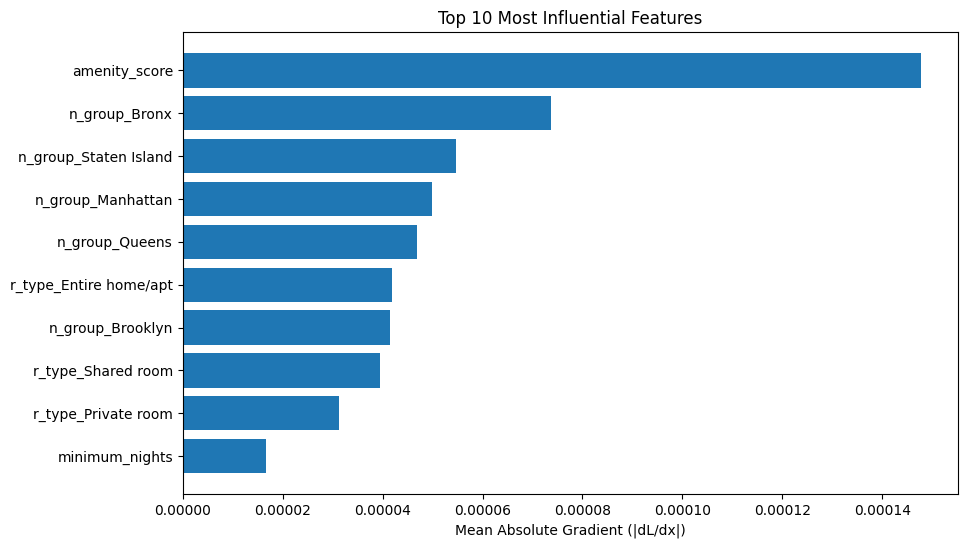

In [40]:
feature_importance_scores = get_feature_importance(model, X_test, y_test)

X = df.drop('price_class', axis=1)

importance_df = pd.DataFrame({
    'Feature': X.columns.tolist(),
    'Gradient_Importance': feature_importance_scores
})

importance_df = importance_df.sort_values(by='Gradient_Importance', ascending=False).reset_index(drop=True)

print(importance_df)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:10][::-1], importance_df['Gradient_Importance'][:10][::-1])
plt.xlabel('Mean Absolute Gradient (|dL/dx|)')
plt.title('Top 10 Most Influential Features')
plt.show()

In [41]:
df_test = pd.read_csv('test.csv')

In [42]:
df_test.head()

,neighbourhood_group,room_type,minimum_nights,amenity_score,number_of_reviews,availability_365,price_class
0,Brooklyn,Entire home/apt,2,84.3,127,270,2
1,Brooklyn,Private room,7,79.5,0,176,1
2,Manhattan,Private room,3,97.1,17,65,2
3,Manhattan,Private room,3,77.4,2,0,1
4,Manhattan,Entire home/apt,2,28.7,27,180,2


In [43]:
# Using one-hot encoding for neighbourhood_group and room_type
df_test = pd.get_dummies(df_test, columns=['neighbourhood_group', 'room_type'], prefix=['n_group', 'r_type'], dtype=int)

In [44]:
df_test.head()

,minimum_nights,amenity_score,number_of_reviews,availability_365,price_class,n_group_Bronx,n_group_Brooklyn,n_group_Manhattan,n_group_Queens,n_group_Staten Island,r_type_Entire home/apt,r_type_Private room,r_type_Shared room
0,2,84.3,127,270,2,0,1,0,0,0,1,0,0
1,7,79.5,0,176,1,0,1,0,0,0,0,1,0
2,3,97.1,17,65,2,0,0,1,0,0,0,1,0
3,3,77.4,2,0,1,0,0,1,0,0,0,1,0
4,2,28.7,27,180,2,0,0,1,0,0,1,0,0


In [45]:
X_test = df_test.drop('price_class', axis=1).values
Y_test = df_test['price_class'].values
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
Y_test_tensor = torch.tensor(Y_test, dtype=torch.long)

In [47]:
importance_scores = get_feature_importance(model, X_test_tensor, Y_test_tensor)

feature_names = X.columns.tolist()

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Gradient_Importance': importance_scores
})

# Rank features by importance (Descending order)
importance_df = importance_df.sort_values(by='Gradient_Importance', ascending=False)

print("Ranked Feature Importance (Gradient-Based):")
print(importance_df)

x_input.shape torch.Size([7297, 12])
target_class.shape torch.Size([7297])
Ranked Feature Importance (Gradient-Based):
                   Feature  Gradient_Importance
1            amenity_score             0.001440
11      r_type_Shared room             0.000632
7           n_group_Queens             0.000328
5         n_group_Brooklyn             0.000243
8    n_group_Staten Island             0.000230
4            n_group_Bronx             0.000193
6        n_group_Manhattan             0.000178
9   r_type_Entire home/apt             0.000142
10     r_type_Private room             0.000124
0           minimum_nights             0.000117
3         availability_365             0.000061
2        number_of_reviews             0.000039


In [51]:
model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs, 1)
    accuracy = (predicted == Y_test_tensor).float().mean()
print(f"Test Accuracy: {accuracy.item():.4f}")

Test Accuracy: 0.0811


### Test Evaluation and Generalization Analysis

1. Performance Overview
Test Accuracy: 8.11%.
Training Accuracy: Implied High (>80%), showing a huge generalization gap.

2. Root Cause: Shortcut Learning & Data Leakage
The model failed because it relied on a wrong feature rather than learning the actual dynamics of the housing market.
- The "Suspicious" Feature: amenity_score showed a 0.83 correlation with the target in training, a clear sign of Data Leakage (the score was likely derived from the price itself).
- Feature Attribution Proof: Gradient analysis confirms amenity_score is the model's primary driver, with importance more than double that of any other feature.
- The Collapse: The model ignored robust indicators (like location and room type) to follow this single feature. When the test set introduced a Distribution Shift—where the amenity_score correlation no longer held—the model’s logic became systematically wrong.

3. Mitigation Strategy
- Drop amenity_score: Remove this feature entirely from the dataset.
- Retrain: Force the neural network to identify patterns within robust, causal features like neighbourhood_group and room_type.
- Expected Outcome: While training accuracy will decrease, test accuracy will significantly improve (likely to the 40–60% range) as the model learns generalizable market logic rather than a training-specific fluke.